In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

In [2]:
#importando o conjunto original de dados
dados = pd.read_excel("dados_frexco.xlsx")

#Importando uma tabela para prever as vendas dos próximos 5 dias
teste = pd.read_excel("test.xlsx")

In [3]:
#Visualizando o dataframe
dados.head()

,Data,Vendas
0,2022-12-06,870
1,2022-12-07,868
2,2022-12-08,1189
3,2022-12-09,742
4,2022-12-10,317


In [4]:
#Vetor para guardar o nome do dia da semana
dia = []
#Vetor para guardar o numero do dia da semana
dia_num = []

#Vetor para guardar o numero do dia da semana da planilha teste
dia_num_test = []
#loop para o dataframe dados
for item in dados['Data']:
    temp = pd.Timestamp(item)
    dia.append(temp.day_name())
    dia_num.append(temp.dayofweek)

#loop para o dataframe teste
for item in teste['Data']:
    temp = pd.Timestamp(item)
    #dia_test.append(temp.day_name())
    dia_num_test.append(temp.dayofweek)
#type(dados['Vendas'])

In [5]:
#Criando a nova coluna com o dia das vendas
dados['Dia'] = dia
dados['Dia_Num'] = dia_num
dados.head()

,Data,Vendas,Dia,Dia_Num
0,2022-12-06,870,Tuesday,1
1,2022-12-07,868,Wednesday,2
2,2022-12-08,1189,Thursday,3
3,2022-12-09,742,Friday,4
4,2022-12-10,317,Saturday,5


In [ ]:
#dados['Week'] = pd.to_datetime(dados['Data']).dt.week

#dados['WeekDay'] = pd.to_datetime(dados['Data']).dt.dayofweek

In [6]:
dados

,Data,Vendas,Dia,Dia_Num
0,2022-12-06,870,Tuesday,1
1,2022-12-07,868,Wednesday,2
2,2022-12-08,1189,Thursday,3
3,2022-12-09,742,Friday,4
4,2022-12-10,317,Saturday,5
5,2022-12-11,685,Sunday,6
6,2022-12-12,1366,Monday,0
7,2022-12-13,1213,Tuesday,1
8,2022-12-14,1055,Wednesday,2
9,2022-12-15,1343,Thursday,3


In [7]:
#Criando a nova coluna com o dia das vendas para o dataframe "teste"
#teste['Dia'] = dia_test
teste['Dia_Num'] = dia_num_test
teste

,Data,Venda,Dia_Num
0,2023-01-21,NaN,5
1,2023-01-22,NaN,6
2,2023-01-23,NaN,0
3,2023-01-24,NaN,1
4,2023-01-25,NaN,2


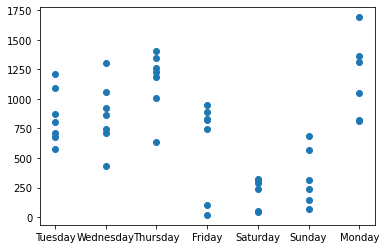

In [11]:
plt.scatter(dados["Dia"],dados["Vendas"])
plt.show()


Obsvando o mapa percebemos que entre sexta e domingo há uma queda nas vendas.

<AxesSubplot:xlabel='Vendas'>

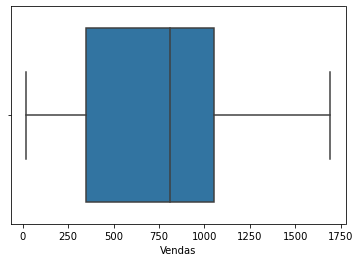

In [12]:
#Verificando outliers
sns.boxplot(x=dados['Vendas'])
#Não há nenhum outlier

In [14]:
#Importando bibliotecas para o modelo de machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

Entre RandomForestRegressor e Linear Regression, decidi usar o primeiro, pois os dias da semana são representados por número
de 0 a 6, e no caso a regressão linear assumirá que o domingo (6) é maior (ou tem mais peso) do que todos os outros dias da semana.
enquanto o Random Forest são normalmente invariantes em escala - elas não assumem maior peso para valores grandes.
Existem outros tipos de modelos mas ainda estou estudando por isso foquei mais nesses dois.

In [19]:
#Excluindo a coluna "Dia" pois as variáveis são categóricas e o modelo não funcionaria.
dados = dados.drop(columns=['Dia'])

predictors=dados.drop(['Data','Vendas'],axis=1)
target = dados['Vendas']
x_train,x_cv,y_train,y_cv=train_test_split(predictors,target, test_size=0.4,random_state=1)

In [20]:
dados.head()

,Data,Vendas,Dia_Num
0,2022-12-06,870,1
1,2022-12-07,868,2
2,2022-12-08,1189,3
3,2022-12-09,742,4
4,2022-12-10,317,5


In [21]:
model = RandomForestRegressor(oob_score=True,n_jobs=1,random_state=7,
                             max_features="auto",min_samples_leaf=4)

In [22]:
model.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=4, n_jobs=1, oob_score=True,
                      random_state=7)

In [23]:
pred=model.predict(x_cv)

In [24]:
r2_score(pred,y_cv)
#Valor do R2 foi baixo mas um dos motivos seria a base de dados que é pequena.

0.08914102907824561

In [25]:
test1=teste.drop(['Data','Venda'],axis=1)

In [26]:
pred2=model.predict(test1)

In [27]:
teste['Venda']=pred2.round(0)

In [28]:
teste

,Data,Venda,Dia_Num
0,2023-01-21,311.0,5
1,2023-01-22,311.0,6
2,2023-01-23,1079.0,0
3,2023-01-24,1049.0,1
4,2023-01-25,1025.0,2


In [29]:
#Adicionando os nomes dos dias da semana
dia = []
for item in teste['Data']:
    temp = pd.Timestamp(item)
    dia.append(temp.day_name())
    
teste['Dia'] = dia
teste    

,Data,Venda,Dia_Num,Dia
0,2023-01-21,311.0,5,Saturday
1,2023-01-22,311.0,6,Sunday
2,2023-01-23,1079.0,0,Monday
3,2023-01-24,1049.0,1,Tuesday
4,2023-01-25,1025.0,2,Wednesday


Como observado anteriormente, as vendes serão maiores de segunda a quarta, com queda no fim de semana.